Try to implement the functions in fsmc_code.py and complete lines with "###"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.linalg import null_space

# Old code for making LaTeX work
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsfonts}']

%matplotlib inline

In [9]:
def compute_Phi_ET(P,ns=100):
    Mt = np.eye(P.shape[0],P.shape[1],dtype=float)
    Phi_list = []
    Phi_list.append(Mt)
    ET = np.zeros((P.shape[0],P.shape[1]),dtype=float)
    
    for i in range(ns):
        Mt = np.dot(P,Mt)
        for j in range(P.shape[0]):
            Mt[j][j] = 1.0
        Phi_list.append(Mt)
        ET += (Mt-Phi_list[i])*(i+1)
    
    Phi_list = np.array(Phi_list)
    
    return Phi_list, ET


def simulate_hitting_time(P, states, nr):
    Time = []
    choice = []
    for i in range(P.shape[1]):
        choice.append(i)
    
    for i in range(nr):
        init = np.eye(1,P.shape[1],k = 0,dtype=float)
        flag = 0
        count = 0
        for j in range(nr):
            state_dis = np.dot(init,P)
            state_now = np.random.choice(choice,1,replace=True,p=state_dis[0])
            count += 1
            
            if state_now[0] == states[1]:
                Time.append(count)
                flag = 1
                break
            init = np.eye(1,P.shape[1],k=state_now[0],dtype=float)
            
        if flag==0:
            Time.append(0)
        
    return Time


def stationary_distribution(P):
    I = np.eye(P.shape[0],P.shape[1],dtype=float)
    Ones = np.ones((1,P.shape[1]),dtype=float)
    Temp = np.append(np.transpose(P)-I,Ones,axis=0)
    
    b = np.zeros(P.shape[1])
    b = np.append(b,[1],axis=0)
    b = np.transpose(b)
    
    result = np.linalg.solve(np.dot(np.transpose(Temp),Temp),np.dot(np.transpose(Temp),b))

    return result

### Exercise 1

What is the distribution of the number of fair coin tosses before one observes 3 heads in a row? To solve this, consider a 4-state Markov chain with transition probability matrix
$$
    P = 
    \begin{bmatrix}
        0.5 & 0.5 & 0 & 0 \\
        0.5 & 0 & 0.5 & 0 \\
        0.5 & 0 & 0 & 0.5 \\
        0 & 0 & 0 & 1
    \end{bmatrix}
$$
where $ X_t = 1 $ if the previous toss was tails, $ X_t = 2 $ if the last two tosses were tails then heads, $ X_t = 3 $ if the last three tosses were tails then heads twice, and $ X_t = 4 $ is an absorbing state that is reached when the last three tosses are heads. 

* ** (15 pts) ** Write a computer program (e.g., in Python, Matlab, ...) to compute $ \Pr(T_{1,4} = m) $ for $ m = 1, 2, \ldots, 100 $ and ** (10 pts) ** use this to compute and print an estimate of the expected number of tosses $ \mathbb{E}[T_{1,4}] $ 

Text(0.5, 1.0, 'E[T_{1,4}] = 13.970568255020394')

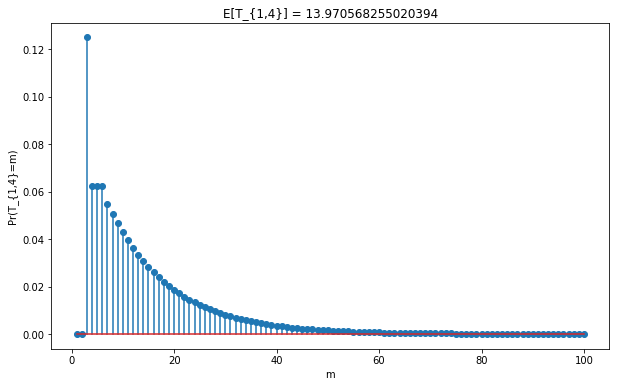

In [3]:
# See compute_Phi_ET in fsmc_code.py

P = np.array([[0.5, 0.5, 0, 0], [0.5, 0, 0.5, 0], [0.5, 0, 0, 0.5], [0, 0, 0, 1]])  
Phi_list, ET = compute_Phi_ET(P, 100)

m = []### steps to be plotted
for i in range(1,101):
    m.append(i)
    
Pr = []### \Pr(T_{1,4} = m) for all m
for i in range(100):
    Pr.append(Phi_list[i+1][0][3]-Phi_list[i][0][3])

E = ET[0][3]### \mathbb{E}[T_{1,4}]

plt.figure(figsize=(10, 6))
plt.stem(m, Pr)
plt.xlabel(r'm')
plt.ylabel(r'Pr(T_{1,4}=m)')
plt.title(r'E[T_{1,4}] = ' + str(E))

* ** (15 pts) ** Write a computer program that generates 500 realizations from this Markov chain and ** (10 pts) ** uses them to plot a histogram of $ T_{1,4} $ and compute/print an estimate of the expected number of tosses $ \mathbb{E}[T_{1,4}] $.

Text(0.5, 1.0, 'mean of T_{1,4} = 14.374')

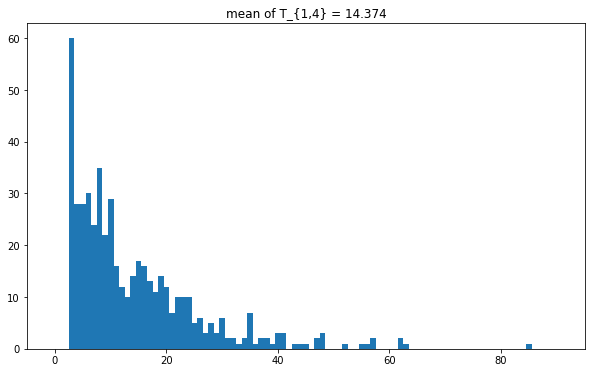

In [4]:
# implement simulate_hitting_time(P, states, nr) in fsmc_code.py
        
T = simulate_hitting_time(P, [0, 3], 500)
plt.figure(figsize=(10, 6))
plt.hist(T, bins=np.arange(max(T))-0.5)
plt.title(r'mean of T_{1,4} = ' + str(np.mean(T)))

### Exercise 2

Consider the miniature chutes and ladders game shown in Figure 1. 
Assume a player starts on the space labeled 1 and plays by rolling a fair four-sided die and then moves that number of spaces. 
If a player lands on the bottom of a ladder, then they automatically climb to the top. 
If a player lands at the top of a slide, then they automatically slide to the bottom. 
This process can be modeled by a Markov chain with $ n = 16 $ states where each state is associated with a square where players can start their turn (e.g., players never start at the bottom of a ladder or the top of a slide). 
To finish the game, players must land exactly on space 20 (moves beyond this are not taken). 

* ** (10 pts) ** Compute the transition probability matrix $ P $ of the implied Markov chain. 

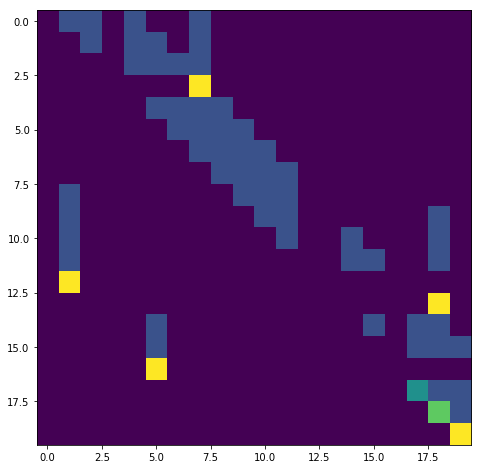

In [5]:
# You can either do this by hand (e.g., look at picture and write down matrix) or by automating the process.

# By hand
P = np.asarray([[...],[...],[...],...])

###

# Or automated general function for Chutes and Ladders games
def construct_P_matrix(n, dice, chutes, ladders):
    '''
    Arguments:
        n {int} -- size of the state space
        dice {numpy.array} -- probability distribution of the dice outcome
        chutes {list[(int, int)]} -- the list of chutes, in pairs of (start, end)
        ladders {list[(int, int)]} -- the list of ladders, in pairs of (start, end)

    Returns:
        P {numpy.array} -- n x n, transition matrix of the Markov chain
    '''
    P = np.zeros((n,n),dtype=float)
    
    for i in range(n):
        if i+1>=n:
            P[i][i]=1.0
            continue
        
        flag_chu = 0
        for k in range(len(chutes)):
            if i==chutes[k][0]:
                P[i][chutes[k][1]] = 1.0
                flag_chu = 1
                break;
        if flag_chu == 1:
            continue
        
        flag_lad = 0
        for k in range(len(ladders)):
            if i==ladders[k][0]:
                P[i][ladders[k][1]] = 1.0
                flag_lad = 1
                break;
        if flag_lad==1:
            continue
        
        for j in range(1,len(dice)+1):
            if(i+j>=n):
                P[i][i] += dice[j-1]
            else:
                flag_chu = 0
                for k in range(len(chutes)):
                    if i+j==chutes[k][0]:
                        P[i][chutes[k][1]] += dice[j-1]
                        flag_chu = 1
                        break
                if flag_chu==1:
                    continue
                    
                flag_lad = 0
                for k in range(len(ladders)):
                    if i+j == ladders[k][0]:
                        P[i][ladders[k][1]] += dice[j-1]
                        flag_lad = 1
                        break
                if flag_lad == 1:
                    continue
                    
                P[i][i+j] += dice[j-1]
                
    return P
    

n = 20### number of states
dice = [0.25,0.25,0.25,0.25] ### probability distribution of dice
chutes = [(12,1),(16,5)] ### (sorce, destination) pairs of chutes
ladders = [(3,7),(13,18)] ### (sorce, destination) pairs of ladders
P = construct_P_matrix(n, dice, chutes, ladders)
###

# Plot transition matrix
plt.figure(figsize=(8, 8))
plt.imshow(P)

* ** (10 pts) ** For this Markov chain, use function from Exercise 1 to compute and plot the cumulative distribution of the number turns a player takes to finish (i.e., the probability $ \Pr(T_{1, 20} \le m) $ where $ T_{1, 20} $ is the hitting time from state 1 to state 20).
Compute and print the mean $\mathbb{E}[T_{1,20}]$. 

Text(0.5, 1.0, 'E[T_{1,20}] = 12.792331782072552')

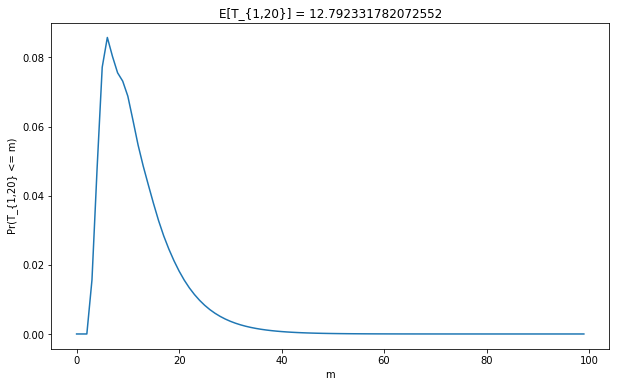

In [6]:
# Use previous functions to complete this exercise
Phi_list, ET = compute_Phi_ET(P, ns=100)

m = [] ### steps to be plotted
for i in range(100):
    m.append(i)

Pr = [] ### \Pr(T_{1,20} <= m) for all m
for i in range(100):
    Pr.append(Phi_list[i+1][0][19]-Phi_list[i][0][19])
E = ET[0][19] ### \mathbb{E}[T_{1,20}]

plt.figure(figsize=(10, 6))
plt.plot(m ,Pr)
plt.xlabel(r'm')
plt.ylabel(r'Pr(T_{1,20} <= m)')
plt.title(r'E[T_{1,20}] = ' + str(E))

* ** (10 pts) ** Use function from Exercise 1 to generate 500 realizations from this Markov chain.  Then, use them to plot a histogram of $ T_{1, 20} $ and compute/print an estimate of the expected number of tosses $\mathbb{E}\left[T_{1,20}\right]$.

Text(0.5, 1.0, 'mean of T_{1,20} =12.082')

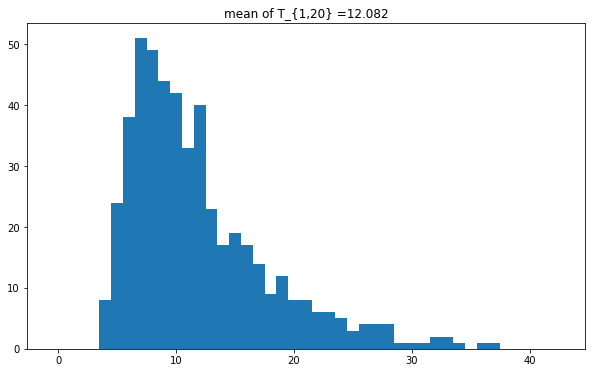

In [7]:
# Use previous funcitons to complete this exercise
T = simulate_hitting_time(P, [0, n-1], 500)
plt.figure(figsize=(10, 6))
plt.hist(T, bins=np.arange(max(T))-0.5)
plt.title(r'mean of T_{1,20} =' + str(np.mean(T)))

* Optional Challenge: If the ﬁrst player rolls 4 and climbs the ladder to square 8, then what is the probability that the second player will win.

In [ ]:
# Use previous functions to complete this exercise

### compute Pr_win


### Example 1

In a certain city, it is said that the weather is rainy with a 90% probability if it was rainy the previous day and with a 50% probability if it not rainy the previous day. 
If we assume that only the previous day’s weather matters, then we can model the weather of this city by a Markov chain with $ n = 2 $ states whose transitions are governed by
$$
    P = 
    \begin{bmatrix}
        0.9 & 0.1 \\
        0.5 & 0.5
    \end{bmatrix}
$$
Under this model, what is the steady-state probability of rainy weather?


In [10]:
# implement stationary_distribution(P) in fsmc.py

P = np.array([[0.9, 0.1], [0.5, 0.5]])
stationary_distribution(P)

array([0.83333333, 0.16666667])

### Exercise 3

** (10 pts) ** Write a program to compute the stationary distribution of a Markov chain when it is unique.
Consider a game where the gameboard has 8 diﬀerent spaces arranged in a circle. 
During each turn, a player rolls two 4-sided dice and moves clockwise by a number of spaces equal to their sum. 
** (5 pts) ** Define the transition matrix for this 8-state Markov chain and compute its stationary distribution.

In [12]:
# Use previous functions to complete this exercise
def construct_clockwise_matrix(n,dice,special):
    M = np.zeros((n,n))
    for i in range(n):
        if i==special:
            M[i][i] += 0.75
            for j in range(1,5):
                M[i][(i+2*j)%8] += 0.0625
        else:
            for j in range(2,9):
                M[i][(i+j)%8] += dice[j-2] 

    return M

n = 8
dice = [0.0625,0.125,0.1875,0.25,0.1875,0.125,0.0625]
P = construct_clockwise_matrix(n,dice,-1) ### construct the transition matrix
print(P)
stationary_distribution(P)

[[0.0625 0.     0.0625 0.125  0.1875 0.25   0.1875 0.125 ]
 [0.125  0.0625 0.     0.0625 0.125  0.1875 0.25   0.1875]
 [0.1875 0.125  0.0625 0.     0.0625 0.125  0.1875 0.25  ]
 [0.25   0.1875 0.125  0.0625 0.     0.0625 0.125  0.1875]
 [0.1875 0.25   0.1875 0.125  0.0625 0.     0.0625 0.125 ]
 [0.125  0.1875 0.25   0.1875 0.125  0.0625 0.     0.0625]
 [0.0625 0.125  0.1875 0.25   0.1875 0.125  0.0625 0.    ]
 [0.     0.0625 0.125  0.1875 0.25   0.1875 0.125  0.0625]]


array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

Next, suppose that one space is special (e.g., state-1 of the Markov chain) and a player can only leave this space by rolling doubles (i.e., when both dice show the same value). Again, the player moves clockwise by a number of spaces equal to their sum. ** (5 pts) ** Deﬁne the transition matrix for this 8-state Markov chain and compute its stationary probability distribution.

In [13]:
# Use previous functions to complete this exercise
special = 1
P = construct_clockwise_matrix(n,dice,special)### construct the transition matrix
print(P)
stationary_distribution(P)

[[0.0625 0.     0.0625 0.125  0.1875 0.25   0.1875 0.125 ]
 [0.     0.8125 0.     0.0625 0.     0.0625 0.     0.0625]
 [0.1875 0.125  0.0625 0.     0.0625 0.125  0.1875 0.25  ]
 [0.25   0.1875 0.125  0.0625 0.     0.0625 0.125  0.1875]
 [0.1875 0.25   0.1875 0.125  0.0625 0.     0.0625 0.125 ]
 [0.125  0.1875 0.25   0.1875 0.125  0.0625 0.     0.0625]
 [0.0625 0.125  0.1875 0.25   0.1875 0.125  0.0625 0.    ]
 [0.     0.0625 0.125  0.1875 0.25   0.1875 0.125  0.0625]]


array([0.07447989, 0.41836864, 0.08285234, 0.10176963, 0.07092795,
       0.09311176, 0.0625555 , 0.09593429])